<a href="https://colab.research.google.com/github/gskumlehn/timelens/blob/main/Mapa_de_interesse_por_regi%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Para criar uma mapa de interesse por região brasileira, depois de realizada a busca no google trends com período definido, é necessário fazer o download dos dados em .csv

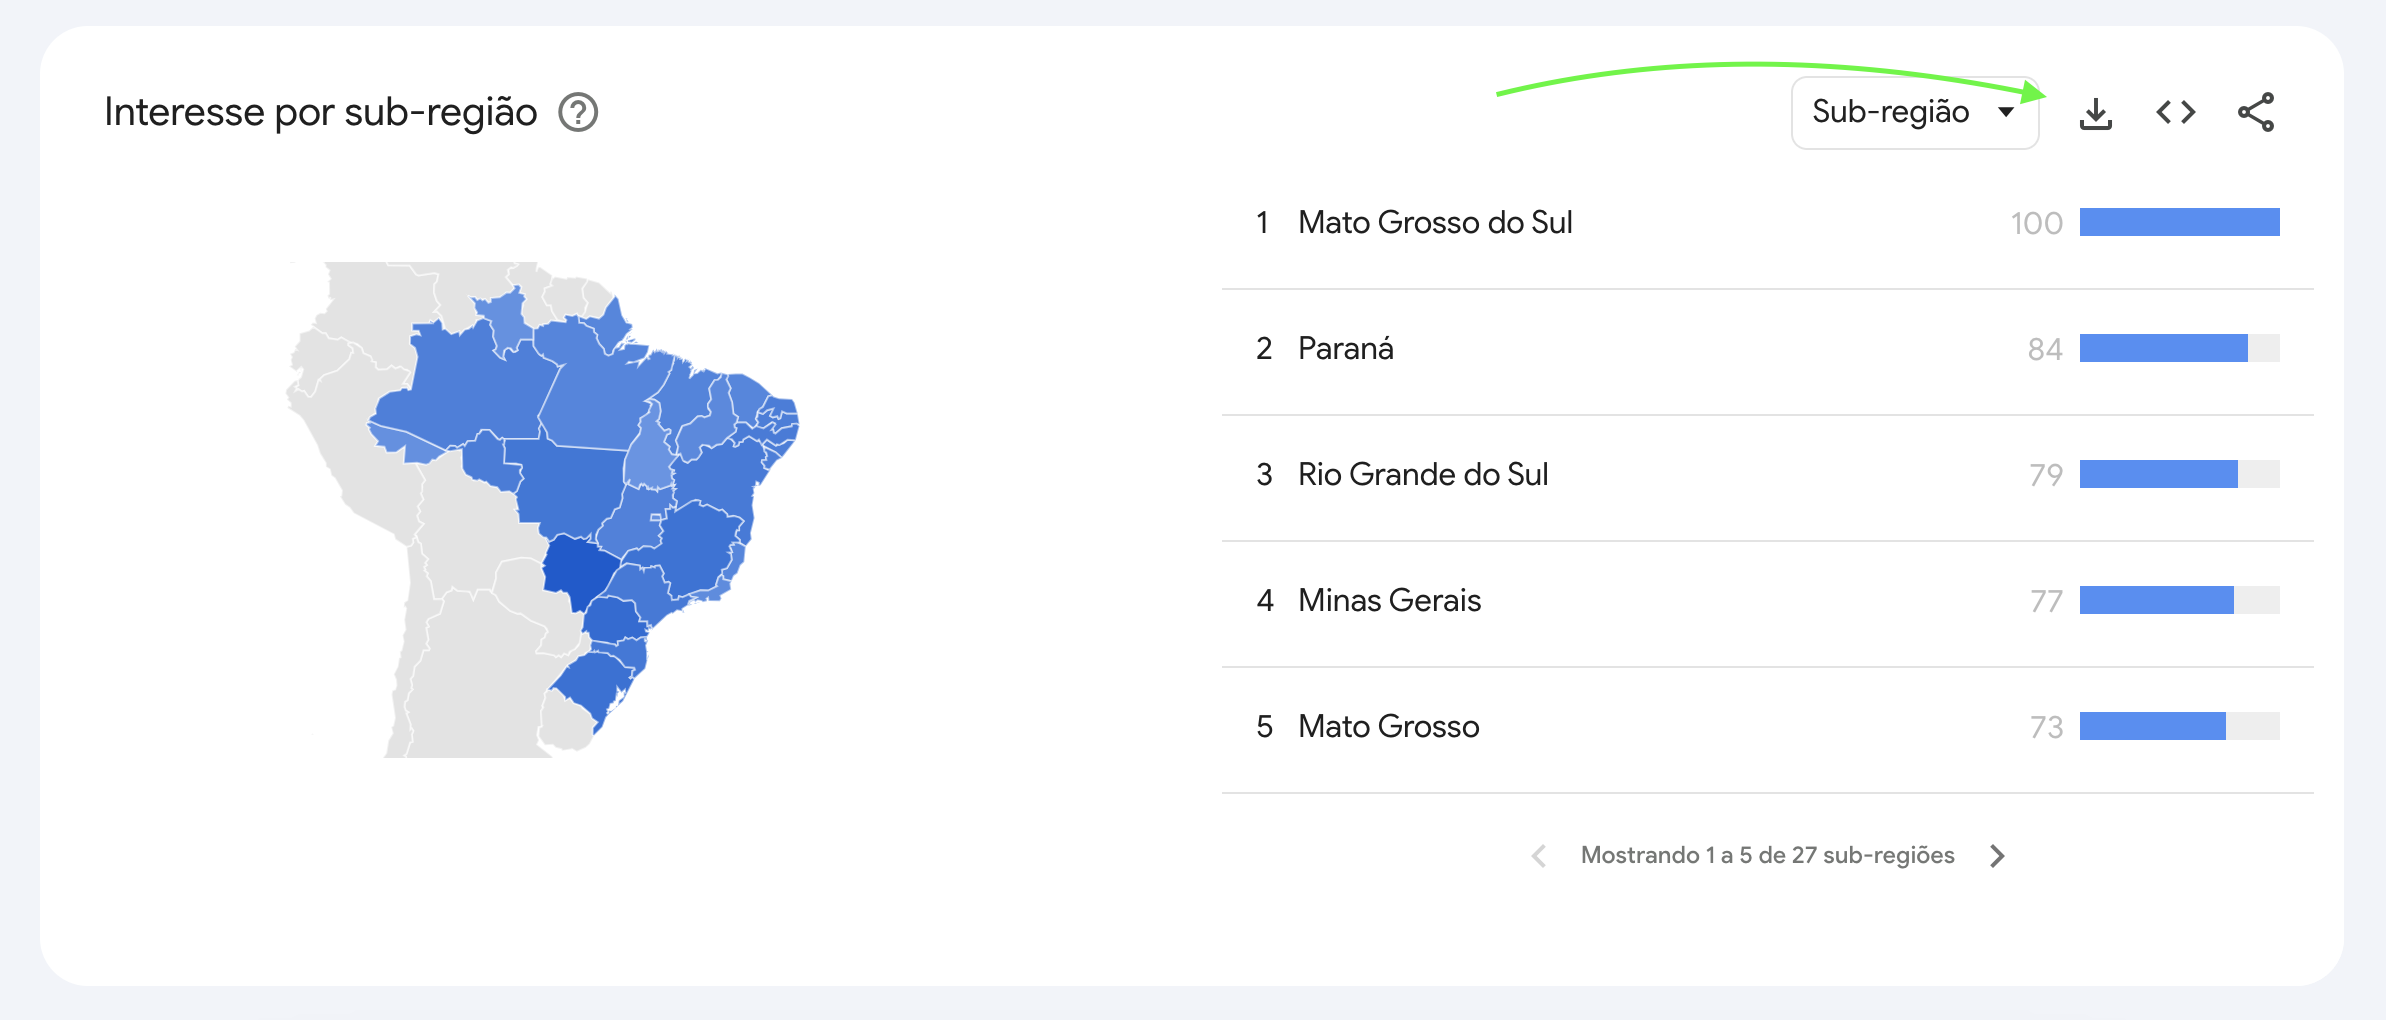

# O arquivo será baixado com o nome padrão geoMap.csv, e deve ser adicionado aqui para leitura. **É imprescindível que o nome do arquivo seja o mesmo**

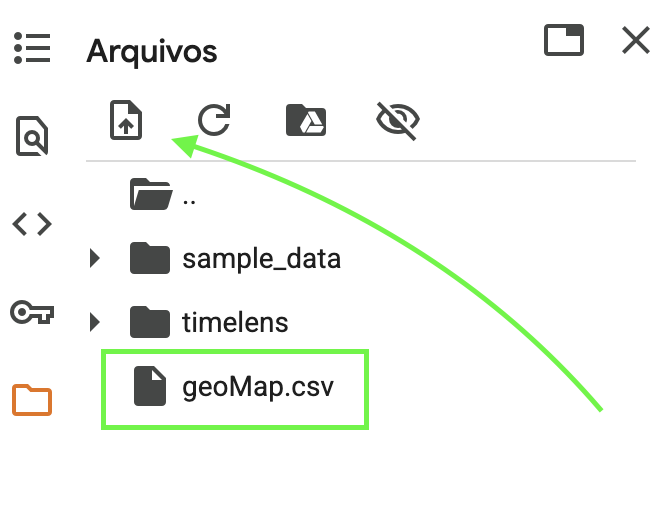

# Na célula abaixo a legenda do gráfico séra definida. Preencha dentro das aspas

In [79]:
title = "Interesse por Luan Santana nos últimos 5 anos"

# Para concluir e criar a imagem, em "Ambiente de execução" selecionar "Executar tudo"
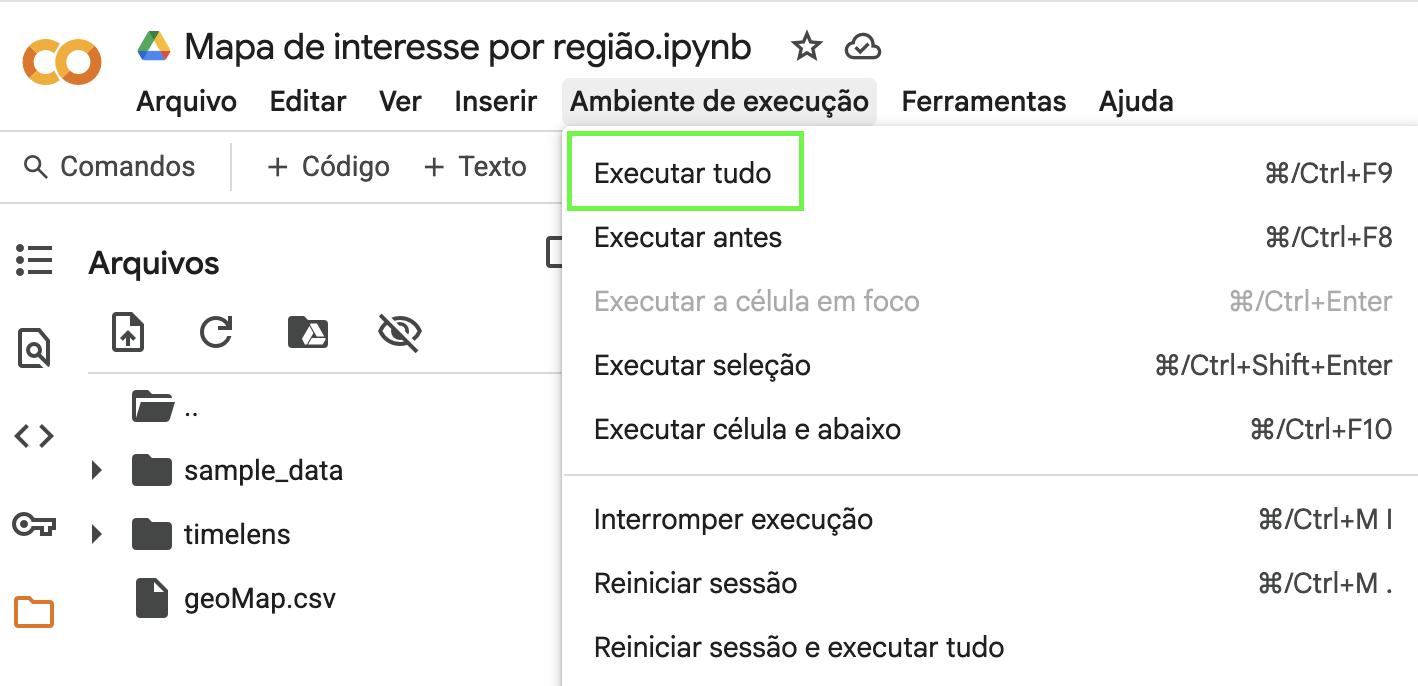

# A imagem em .png será salva com o nome definido para a legenda e com fundo invisível

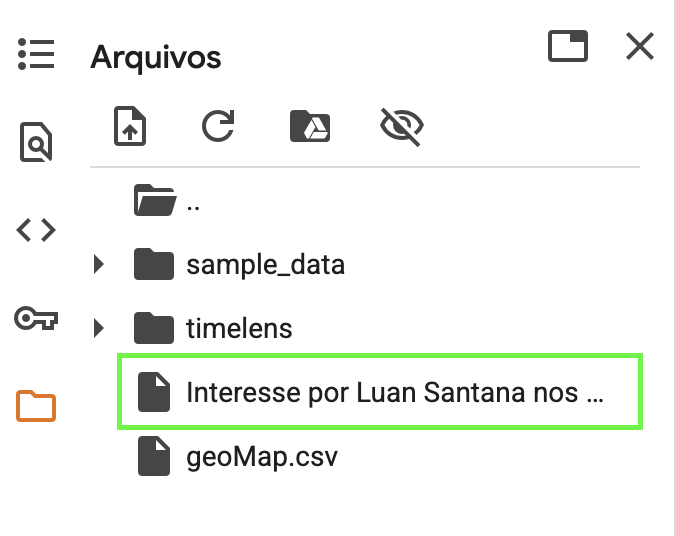

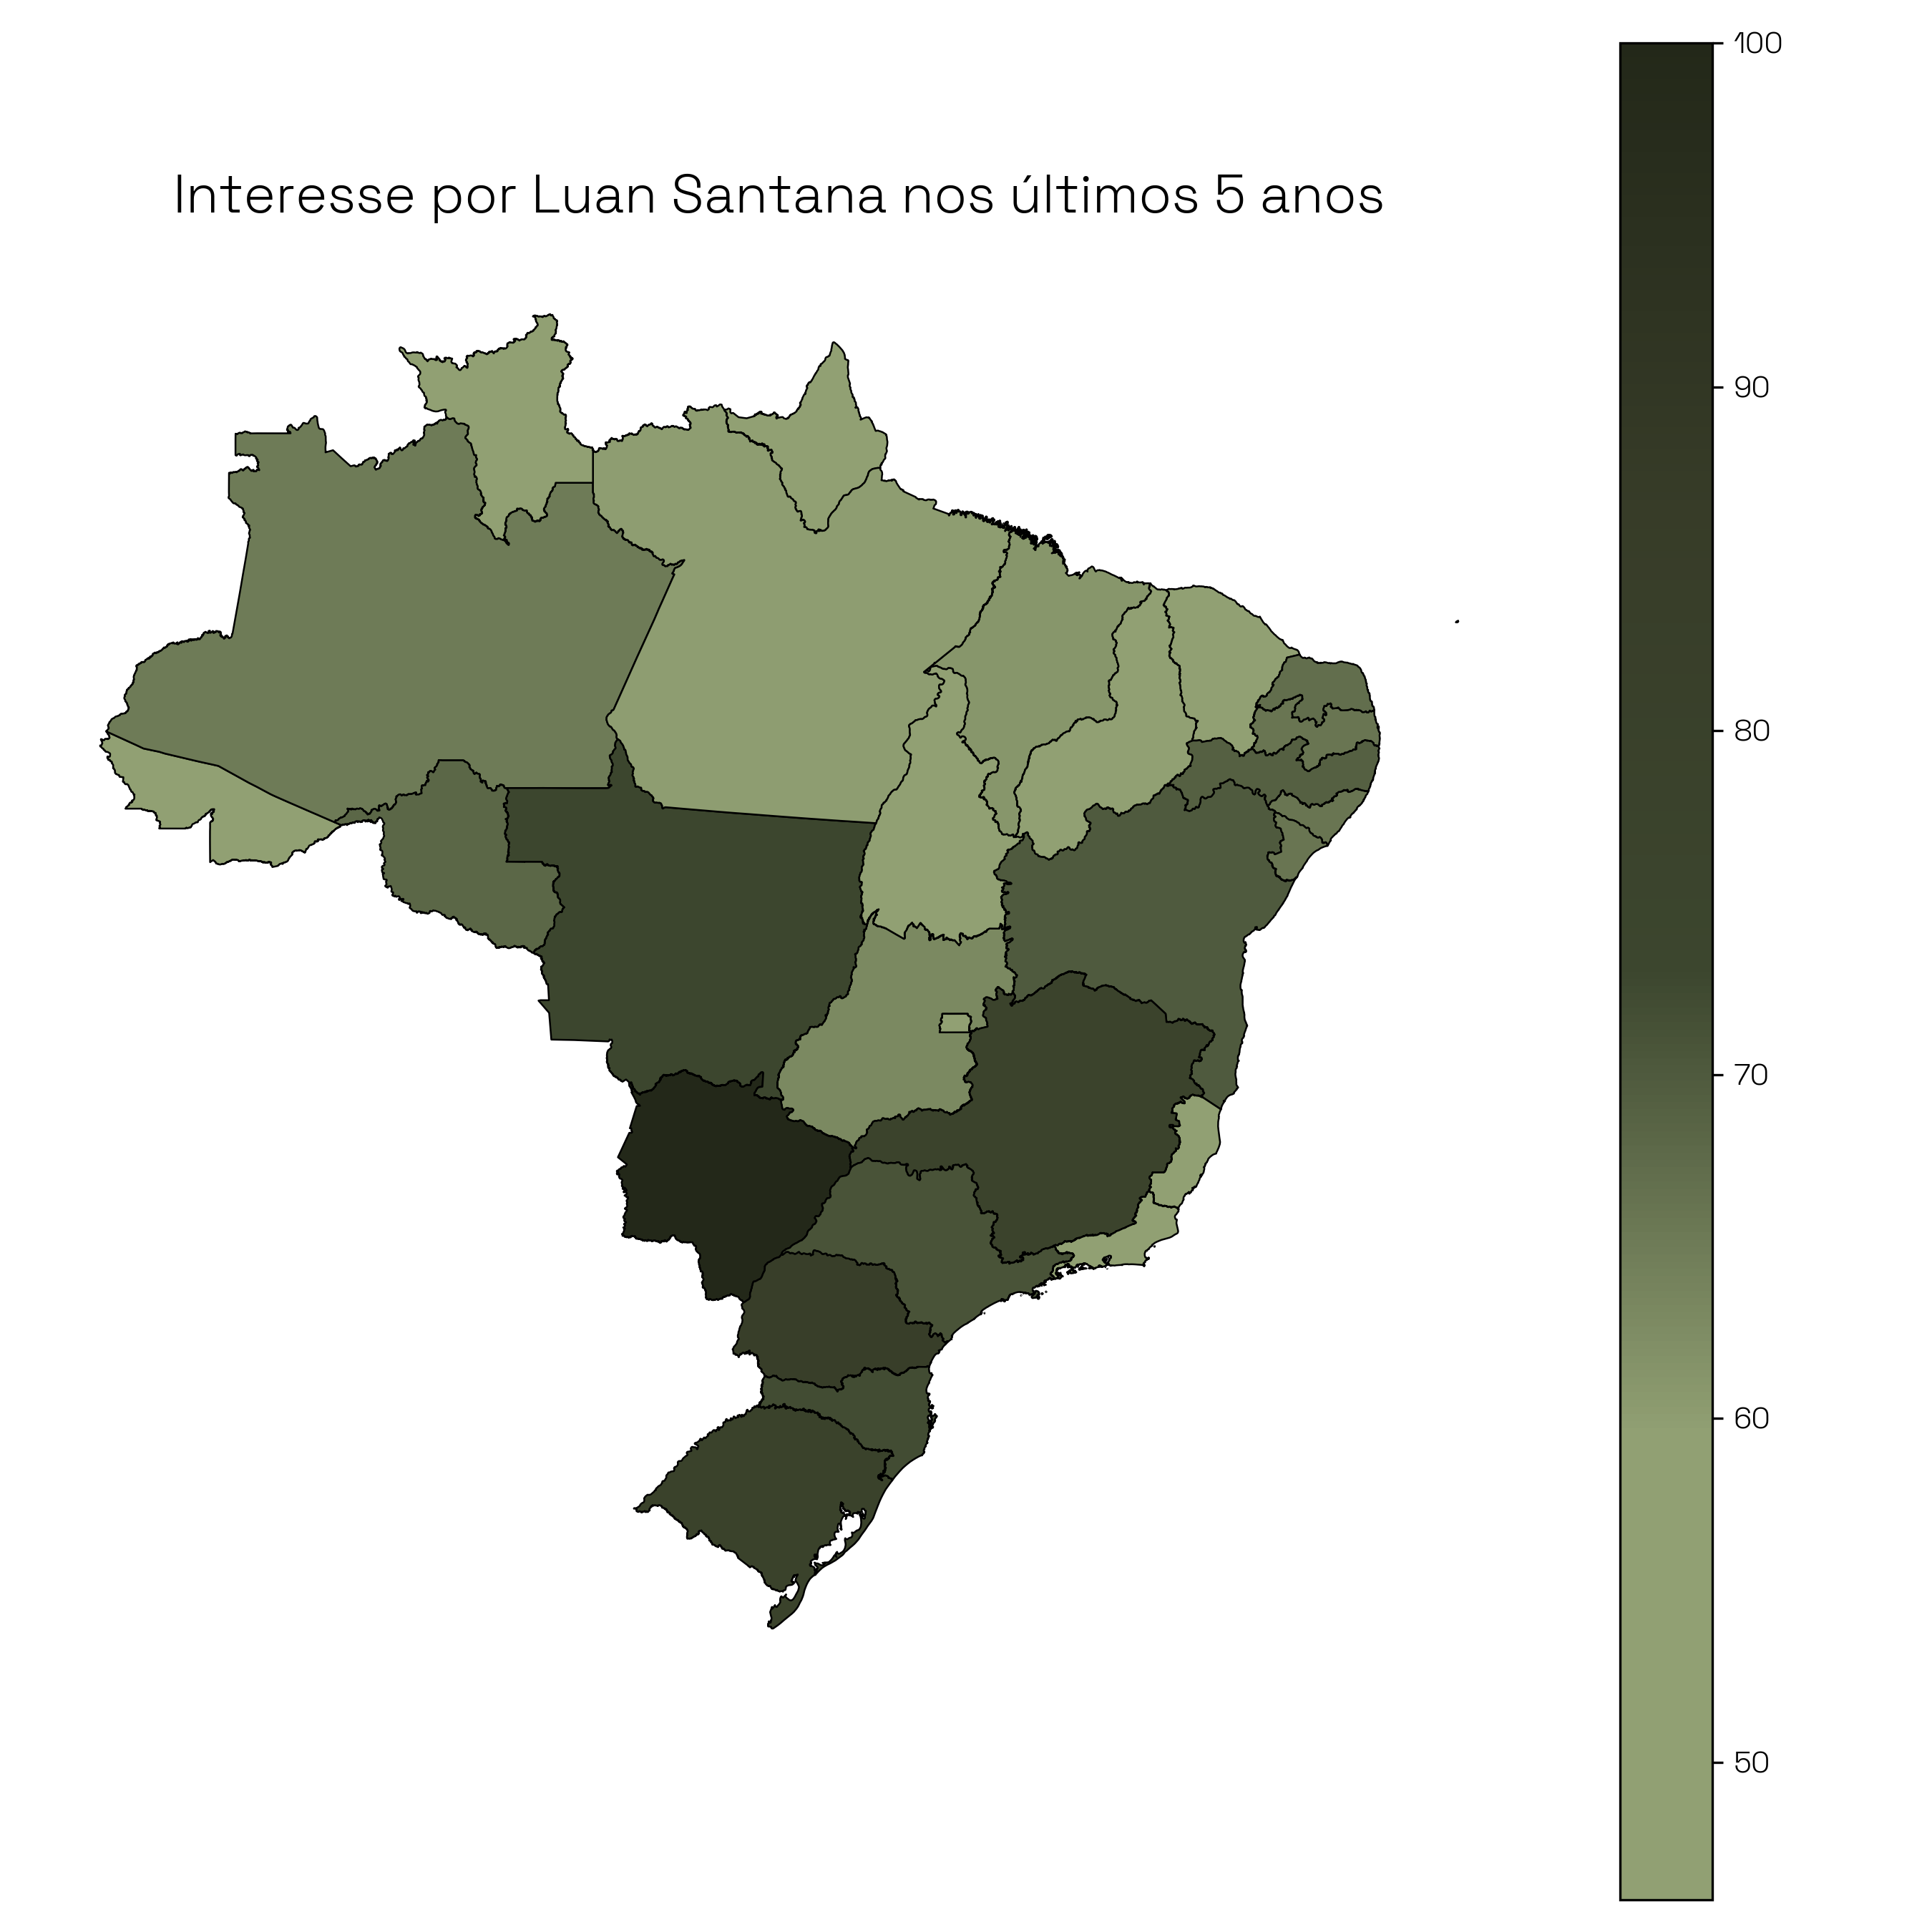

In [80]:
pip install unidecode

In [81]:
import os

if not os.path.exists("timelens/"):
  !git clone --filter=blob:none --sparse https://github.com/gskumlehn/timelens.git
  %cd timelens

  !git sparse-checkout init --cone
  !git sparse-checkout set font

  %cd ..

In [82]:
font_path = "timelens/font/SpaceGrotesk.ttf"

if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    plt.rcParams['font.family'] = 'Space Grotesk'
else:
  print("Erro ao encontrar fonte")

In [83]:
import pandas as pd

df = pd.read_csv("geoMap.csv", skiprows=2, header=None, usecols=[0, 1])
df.columns = ["state", "interest"]
df["interest"] = pd.to_numeric(df["interest"], errors="coerce").fillna(0).astype(int)

In [84]:
import geopandas as gpd
url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
shape = gpd.read_file(url)

In [85]:
from unidecode import unidecode

shape["key"] = shape["name"].apply(lambda x: unidecode(x).lower())
df["key"]    = df["state"].apply(lambda x: unidecode(x).lower())

gdf = shape.merge(df, on="key", how="left")

In [86]:
from matplotlib.colors import LinearSegmentedColormap

colors = [
    "#232819",  # muito baixo
    "#373c28",
    "#3c462e",
    "#91a073",
    "#91a073"   # muito alto
][::-1]
custom_cmap = LinearSegmentedColormap.from_list("custom", colors, N=256)


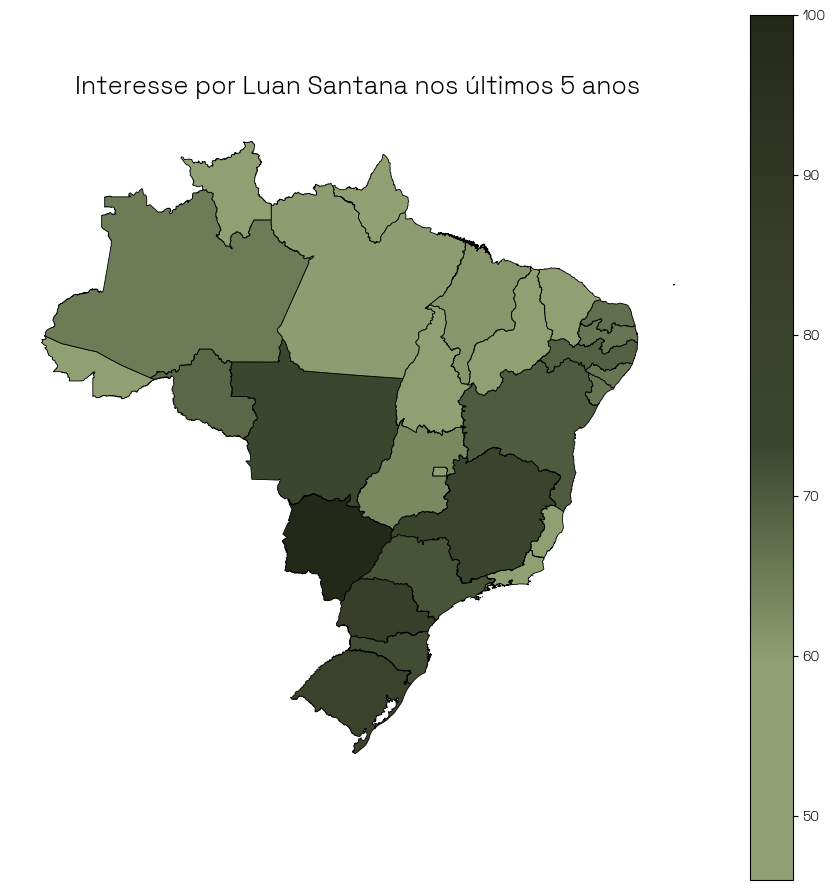

In [87]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 9))
gdf.plot(
    column="interest",
    cmap=custom_cmap,
    linewidth=0.6,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title(title, fontsize=18, pad=12)
ax.axis("off")
plt.tight_layout()
plt.savefig(f"{title}.png", dpi=300, transparent=True)
plt.show()
